In [1]:
import pandas as pd
import numpy as np

- 엑셀로, 콤마와 슬래시(/)는 마침표로 모두 변경함

In [84]:
df = pd.read_csv('body_dataset_ex1.csv',encoding='cp949')
df

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,발너비,얼굴너비,손직선길이,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,9.9,12.9,16.0,9.2,7.8,62.9,32.8,F,37,7.8
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,9.3,13,17.0,9.2,7.0,56.1,31.5,F,26,2.7
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,9.2,11.2,16.9,9.7,7.6,53.2,25.2,F,39,8.0
3,8,23,F004,164.1,137.8,83.2,123.3,100.1,75.4,42.4,...,9.3,13.8,17.0,10.1,7.6,49.4,21.8,F,30,2.5
4,8,23,F005,152.9,127.7,71.1,111.3,93.8,63.3,37.0,...,9.8,11.9,16.2,9.1,7.9,51.9,24.2,F,44,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11,30,M498,167.3,141.2,81.4,123.8,98.5,72.4,42.4,...,9.8,14.2,18.1,9.9,7.9,68,15.6,M,58,4.3
996,11,30,M499,169.9,143.2,81.3,127.9,97.6,69.1,42.4,...,10,14.6,17.2,9.7,8.2,65.2,17.8,M,53,4.5
997,11,29,M500,173.7,145.3,84.6,128.0,101.5,74.8,44.4,...,10.3,14.1,18.4,10.1,8.0,67.2,20.3,M,30,2.9
998,9,28,F339,153.4,127.4,78.6,111.5,92.1,68.0,37.4,...,9.8,13.2,16.5,9.3,7.2,52.1,35.6,F,61,6.7


In [85]:
col = df.columns
col

Index(['측정월', '측정일', '모델번호', '키', '목뒤높이', '엉덩이높이', '겨드랑높이', '허리높이', '샅높이',
       '무릎높이', '머리둘레', '목둘레', '젖가슴둘레', '허리둘레', '배꼽수준허리둘레', '엉덩이둘레', '넙다리둘레',
       '무릎둘레', '장딴지둘레', '종아리최소둘레', '발목둘레', '편위팔둘레', '편팔꿈치둘레', '손목둘레', '위팔길이',
       '팔길이', '어깨사이너비', '머리수직길이', '얼굴수직길이', '발크기', '발너비', '얼굴너비', '손직선길이',
       '손바닥직선길이', '손안쪽가쪽직선길이', '몸무게', '체지방율', '성별', '나이', '신발굽높이'],
      dtype='object')

In [86]:
df = df.astype(str)

In [87]:
pattern = r'\d{2}\.\d{3}\.\d'

matches = []  # 패턴에 맞는 데이터와 컬럼명을 저장할 리스트

for column in df.columns:
    for index, value in df[column].dropna().items():
        if pd.notnull(value) and pd.Series(value).str.contains(pattern).iloc[0]:
            matches.append((index, column, value))

# 패턴에 맞는 데이터와 컬럼명 출력
for match in matches:
    print(f"인덱스: {match[0]}, 컬럼명: {match[1]}, 데이터: {match[2]}")

인덱스: 644, 컬럼명: 팔길이, 데이터: 59.440.9
인덱스: 587, 컬럼명: 머리수직길이, 데이터: 25.412.4
인덱스: 644, 컬럼명: 머리수직길이, 데이터: 10.724.4


In [88]:
df.loc[644, '팔길이'] = 59.4
df.loc[644, '머리수직길이'] = 24.4
df.loc[587, '머리수직길이'] = 25.4

In [89]:
df['팔길이'].unique()

array(['52.1', '54.6', '52.5', '57', '49', '51.1', '53.1', '51.5', '55.9',
       '52', '50.3', '50.5', '54.8', '52.3', '54.5', '48.9', '54.4',
       '53.8', '49.8', '52.2', '51', '54.3', '53', '55', '54', '51.9',
       '46.1', '55.5', '53.9', '50.8', '48', '50', '49.4', '48.1', '50.4',
       '55.7', '52.7', '53.6', '54.2', '51.7', '48.6', '48.5', '49.3',
       '49.5', '56.8', '48.3', '53.7', '53.3', '32.7', '52.8', '51.2',
       '55.2', '51.4', '51.3', '53.5', '51.6', '49.7', '57.6', '48.4',
       '50.6', '52.9', '54.7', '48.8', '53.2', '47.4', '53.4', '49.1',
       '54.1', '56.3', '50.7', '49.9', '50.9', '57.1', '52.4', '46.7',
       '45.2', '49.2', '50.2', '44.5', '56', '52.6', '58.2', '48.7',
       '48.2', '46.8', '49.6', '47.5', '55.8', '51.8', '46.2', '50.1',
       '46.5', '55.4', '46.6', '56.5', '55.3', '47.2', '47.3', '58.9',
       '56.4', '57.3', '57.7', '58.1', '58.7', '59.8', '57.9', '56.1',
       '56.9', '55.1', '58.4', '56.7', '58.3', '58', '55.6', '56.2',
    

In [90]:
df['머리수직길이'].unique()

array(['21.2', '22.1', '19.2', '21.8', '22.5', '22.8', '21.1', '21.4',
       '21.3', '21', '20.2', '22.3', '22.2', '21.7', '20.4', '19.5',
       '20.5', '19.7', '20.8', '20.7', '20.6', '21.6', '21.5', '22', '20',
       '23.5', '20.3', '20.9', '22.9', '22.4', '22.6', '23.2', '19.8',
       '20.1', '23', '21.9', '23.7', '19.6', '18.8', '23.4', '22.7',
       '24.1', '19.9', '18.6', '17.7', '23.8', '19.4', '19.3', '23.1',
       '19', '18.5', '24', '23.6', '23.9', '24.6', '25.2', '25', '25.1',
       '24.3', '23.3', '24.4', '26', '24.7', 25.4, '24.2', '18.9', '25.5',
       '24.5', 24.4, '26.5', '29', '24.9', '25.3', '24.8', '25.8', '25.6'],
      dtype=object)

- 그 외 다른 형태의 데이터 찾기

In [91]:
df.loc[539,'몸무게']

'Jun.65'

In [92]:
df.loc[539,'위팔길이']

'5월 30일'

In [93]:
df.loc[539,'몸무게'] = 0
df.loc[539,'위팔길이'] = 0

In [94]:
search_value = '8월 13일'

def find_value(x):
    if x == search_value:
        return True
    return False

matches = df.applymap(find_value)

for column in matches.columns:
    for row in matches.index:
        if matches.at[row, column]:
            print(f"행: {row}, 열: {column}")

행: 744, 열: 얼굴너비


- 인덱스 539, 744 데이터 이상한거 확인 -> 0값으로 다 변경해줌

In [95]:
df.loc[744,'얼굴너비'] = 0

In [97]:
search_value = '9.T9689'

def find_value(x):
    if x == search_value:
        return True
    return False

matches = df.applymap(find_value)

for column in matches.columns:
    for row in matches.index:
        if matches.at[row, column]:
            print(f"행: {row}, 열: {column}")

행: 641, 열: 발너비


In [98]:
df.loc[641, '발너비'] = 9

In [100]:
search_value = '13+W867.8'

def find_value(x):
    if x == search_value:
        return True
    return False

matches = df.applymap(find_value)

for column in matches.columns:
    for row in matches.index:
        if matches.at[row, column]:
            print(f"행: {row}, 열: {column}")

행: 596, 열: 얼굴너비


In [101]:
df.loc[596, '얼굴너비'] = 14.2

In [102]:
cols = ['측정월', '측정일', '모델번호', '키', '목뒤높이', '엉덩이높이', '겨드랑높이', '허리높이', '샅높이',
       '무릎높이', '머리둘레', '목둘레', '젖가슴둘레', '허리둘레', '배꼽수준허리둘레', '엉덩이둘레', '넙다리둘레',
       '무릎둘레', '장딴지둘레', '종아리최소둘레', '발목둘레', '편위팔둘레', '편팔꿈치둘레', '손목둘레', '위팔길이',
       '팔길이', '어깨사이너비', '머리수직길이', '얼굴수직길이', '발크기', '발너비', '얼굴너비', '손직선길이',
       '손바닥직선길이', '손안쪽가쪽직선길이', '몸무게', '체지방율', '성별', '나이', '신발굽높이']

convert_dict = {col: float for col in df.columns if col not in ['측정월', '측정일', '모델번호', '성별', '나이']}
df['측정월'] = df['측정월'].astype(float).astype(int)
df['측정일'] = df['측정일'].astype(float).astype(int)
df['나이'] = df['나이'].astype(float).astype(int)

df = df.astype(convert_dict)
df.dtypes

측정월            int64
측정일            int64
모델번호          object
키            float64
목뒤높이         float64
엉덩이높이        float64
겨드랑높이        float64
허리높이         float64
샅높이          float64
무릎높이         float64
머리둘레         float64
목둘레          float64
젖가슴둘레        float64
허리둘레         float64
배꼽수준허리둘레     float64
엉덩이둘레        float64
넙다리둘레        float64
무릎둘레         float64
장딴지둘레        float64
종아리최소둘레      float64
발목둘레         float64
편위팔둘레        float64
편팔꿈치둘레       float64
손목둘레         float64
위팔길이         float64
팔길이          float64
어깨사이너비       float64
머리수직길이       float64
얼굴수직길이       float64
발크기          float64
발너비          float64
얼굴너비         float64
손직선길이        float64
손바닥직선길이      float64
손안쪽가쪽직선길이    float64
몸무게          float64
체지방율         float64
성별            object
나이             int64
신발굽높이        float64
dtype: object

- 인덱스 539, 744 0값 변경해야 함
- 결측치 채우기

- 컬럼생성

In [103]:
# 나이대 컬럼 생성

df['나이대'] = df['나이'].apply(lambda x: str((x // 10) * 10))
df

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,얼굴너비,손직선길이,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,12.9,16.0,9.2,7.8,62.9,32.8,F,37,7.8,30
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,13.0,17.0,9.2,7.0,56.1,31.5,F,26,2.7,20
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,11.2,16.9,9.7,7.6,53.2,25.2,F,39,8.0,30
3,8,23,F004,164.1,137.8,83.2,123.3,100.1,75.4,42.4,...,13.8,17.0,10.1,7.6,49.4,21.8,F,30,2.5,30
4,8,23,F005,152.9,127.7,71.1,111.3,93.8,63.3,37.0,...,11.9,16.2,9.1,7.9,51.9,24.2,F,44,1.5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11,30,M498,167.3,141.2,81.4,123.8,98.5,72.4,42.4,...,14.2,18.1,9.9,7.9,68.0,15.6,M,58,4.3,50
996,11,30,M499,169.9,143.2,81.3,127.9,97.6,69.1,42.4,...,14.6,17.2,9.7,8.2,65.2,17.8,M,53,4.5,50
997,11,29,M500,173.7,145.3,84.6,128.0,101.5,74.8,44.4,...,14.1,18.4,10.1,8.0,67.2,20.3,M,30,2.9,30
998,9,28,F339,153.4,127.4,78.6,111.5,92.1,68.0,37.4,...,13.2,16.5,9.3,7.2,52.1,35.6,F,61,6.7,60


In [104]:
# BMI 컬럼 생성
df['BMI'] = df['몸무게']/((df['키']/100)**2)
df.head(3)

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손직선길이,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,16.0,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,17.0,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,16.9,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422


In [133]:
# 체중 분류 컬럼 생성

def male(data):
    if 0 <= data <= 24:
        return '정상체중'
    else:
        return '비만'

def female(data):
    if 0 <= data <= 31:
        return '정상체중'
    else :
        return '비만'

def classify_body_fat(row):
    if row['성별'] == 'M':
        return male(row['체지방율'])
    elif row['성별'] == 'F':
        return female(row['체지방율'])
    else:
        return '성별 불명'

df['체중분류'] = df.apply(classify_body_fat, axis=1)
df.head(3)

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910,비만
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059,비만
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422,정상체중


In [134]:
df['체중분류'].value_counts()

비만      568
정상체중    432
Name: 체중분류, dtype: int64

- 결측치 찾기

In [107]:
df.isnull().sum()

측정월          0
측정일          0
모델번호         0
키            0
목뒤높이         0
엉덩이높이        0
겨드랑높이        0
허리높이         0
샅높이          0
무릎높이         1
머리둘레         1
목둘레          1
젖가슴둘레        1
허리둘레         1
배꼽수준허리둘레     0
엉덩이둘레        0
넙다리둘레        0
무릎둘레         0
장딴지둘레        0
종아리최소둘레      0
발목둘레         0
편위팔둘레        0
편팔꿈치둘레       0
손목둘레         0
위팔길이         0
팔길이          0
어깨사이너비       0
머리수직길이       0
얼굴수직길이       0
발크기          0
발너비          0
얼굴너비         0
손직선길이        0
손바닥직선길이      0
손안쪽가쪽직선길이    0
몸무게          0
체지방율         0
성별           0
나이           0
신발굽높이        0
나이대          0
BMI          0
체중분류         0
dtype: int64

In [108]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
865,11,11,M368,170.9,143.1,125.0,103.8,74.9,45.4,NaN,...,10.7,7.4,73.3,31.3,M,55,3.5,50,25.096887,비만


In [109]:
n1 = df[df['무릎높이'].isnull()]
n2 = df[df['머리둘레'].isnull()]
n3 = df[df['목둘레'].isnull()]
n4 = df[df['젖가슴둘레'].isnull()]
n5 = df[df['허리둘레'].isnull()]

n1.index.tolist(), n2.index.tolist(), n3.index.tolist(), n4.index.tolist(), n5.index.tolist()

([865], [865], [865], [865], [865])

- 856만 결측치 존재

In [110]:
df.loc[856]

측정월                 11
측정일                 10
모델번호              M359
키                174.0
목뒤높이             145.2
엉덩이높이             83.3
겨드랑높이            127.6
허리높이             105.7
샅높이               75.9
무릎높이              48.1
머리둘레              57.3
목둘레               37.6
젖가슴둘레             87.6
허리둘레              79.8
배꼽수준허리둘레          84.2
엉덩이둘레             94.1
넙다리둘레             56.8
무릎둘레              35.3
장딴지둘레             35.4
종아리최소둘레           20.4
발목둘레              24.2
편위팔둘레             29.4
편팔꿈치둘레            24.2
손목둘레              15.1
위팔길이              31.1
팔길이               54.6
어깨사이너비            37.9
머리수직길이            22.8
얼굴수직길이            12.0
발크기               25.2
발너비                9.4
얼굴너비              14.6
손직선길이             18.7
손바닥직선길이           10.4
손안쪽가쪽직선길이          7.9
몸무게               66.3
체지방율              22.0
성별                   M
나이                  26
신발굽높이              3.5
나이대                 20
BMI          21.898533
체중분류              정상체중
Name: 856, 

- 865번의 사람과 비슷한 키, 몸무게, 나이, 체지방율 값을 가진 데이터의 평균값으로 결측치 대체

In [111]:
c1 = (df['키'] >= 168) & (df['키'] <= 172)
c2 = (df['몸무게'] >= 70) & (df['몸무게'] <= 75)
c3 = (df['체지방율'] >= 6) & (df['체지방율'] <= 24)
c4 = (df['나이대'] == '50')
c5 = (df['성별']=='M')

df_filtered = df[c1 & c2 & c3 & c4 &c5]
df_filtered

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
862,11,10,M365,169.8,144.4,80.3,125.9,102.6,71.6,45.3,...,10.6,8.4,70.3,20.7,M,55,3.5,50,24.382597,정상체중


In [112]:
df.loc[862,['무릎높이','머리둘레','목둘레','젖가슴둘레','허리둘레']]

무릎높이     45.3
머리둘레     54.6
목둘레      38.4
젖가슴둘레    93.2
허리둘레     86.8
Name: 862, dtype: object

In [113]:
df.loc[865, '무릎높이'] = 45.3
df.loc[865, '머리둘레'] = 54.6
df.loc[865, '목둘레'] = 38.4
df.loc[865, '젖가슴둘레'] = 93.2
df.loc[865, '허리둘레'] = 86.8

In [114]:
df.loc[865,['무릎높이','머리둘레','목둘레','젖가슴둘레','허리둘레']]

무릎높이     45.3
머리둘레     54.6
목둘레      38.4
젖가슴둘레    93.2
허리둘레     86.8
Name: 865, dtype: object

In [115]:
df.isnull().sum()

측정월          0
측정일          0
모델번호         0
키            0
목뒤높이         0
엉덩이높이        0
겨드랑높이        0
허리높이         0
샅높이          0
무릎높이         0
머리둘레         0
목둘레          0
젖가슴둘레        0
허리둘레         0
배꼽수준허리둘레     0
엉덩이둘레        0
넙다리둘레        0
무릎둘레         0
장딴지둘레        0
종아리최소둘레      0
발목둘레         0
편위팔둘레        0
편팔꿈치둘레       0
손목둘레         0
위팔길이         0
팔길이          0
어깨사이너비       0
머리수직길이       0
얼굴수직길이       0
발크기          0
발너비          0
얼굴너비         0
손직선길이        0
손바닥직선길이      0
손안쪽가쪽직선길이    0
몸무게          0
체지방율         0
성별           0
나이           0
신발굽높이        0
나이대          0
BMI          0
체중분류         0
dtype: int64

- 539번 사람의 몸무게, 위팔길이
- 744번 사람의 얼굴너비
- 비슷한 키, 몸무게, 나이, 체지방율 값을 가진 데이터의 평균값으로 대체
- 539번 사람 몸무게 값 없으니 몸무게 제외하고 비교

In [116]:
zero_rows = df[(df == 0).any(axis=1)]
print(zero_rows)

     측정월  측정일  모델번호      키   목뒤높이  엉덩이높이  겨드랑높이   허리높이   샅높이  무릎높이  ...  \
539   10    6  M042  170.7  141.7   85.5  123.9  102.4  74.9  44.4  ...   
744   10   28  M247  161.1  132.2   78.1  116.7   98.7  68.2  41.5  ...   

     손바닥직선길이  손안쪽가쪽직선길이   몸무게  체지방율  성별  나이  신발굽높이  나이대        BMI  체중분류  
539     10.5        8.3   0.0  18.9   M  42    3.3   40   0.000000  정상체중  
744      9.9        8.4  68.8  27.3   M  61    4.5   60  26.509245    비만  

[2 rows x 43 columns]


In [117]:
df.loc[539, ['키','몸무게','체지방율','나이','성별']]

키       170.7
몸무게       0.0
체지방율     18.9
나이         42
성별          M
Name: 539, dtype: object

In [118]:
c1 = (df['키'] >= 168) & (df['키'] <= 172)
c3 = (df['체지방율'] <= 24)
c4 = (df['나이대'] == '40')
c5 = (df['성별']=='M')

df_filtered = df[c1 & c3 & c4 &c5]
df_filtered[['몸무게','위팔길이']]

,몸무게,위팔길이
523,62.5,33.1
539,0.0,0.0
636,70.2,30.3
679,66.0,29.9
717,65.4,29.6
754,62.9,31.8
775,76.4,31.0
791,70.7,30.2
800,58.9,32.6
805,62.0,30.7


In [119]:
df_filtered_nonzero = df_filtered[~((df_filtered['몸무게'] == 0) | (df_filtered['위팔길이'] == 0))]
df_filtered_nonzero[['몸무게','위팔길이']]

,몸무게,위팔길이
523,62.5,33.1
636,70.2,30.3
679,66.0,29.9
717,65.4,29.6
754,62.9,31.8
775,76.4,31.0
791,70.7,30.2
800,58.9,32.6
805,62.0,30.7
839,97.4,31.3


In [120]:
weight_539 = round(df_filtered_nonzero['몸무게'].mean(),1)
arm_539 = round(df_filtered_nonzero['위팔길이'].mean(),1)
weight_539, arm_539

(68.7, 31.1)

In [121]:
df.loc[539,'몸무게'] = weight_539
df.loc[539,'위팔길이'] = arm_539

In [122]:
df.loc[539,['몸무게','위팔길이']]

몸무게     68.7
위팔길이    31.1
Name: 539, dtype: object

In [123]:
df.loc[744, ['키','몸무게','체지방율','나이','성별']]

키       161.1
몸무게      68.8
체지방율     27.3
나이         61
성별          M
Name: 744, dtype: object

In [124]:
c1 = (df['키'] >= 159) & (df['키'] <= 163)
c2 = (df['몸무게'] >= 65) & (df['몸무게'] <= 72)
c3 = (df['체지방율'] > 24)
c4 = (df['나이대'] == '60')
c5 = (df['성별']=='M')

df_filtered = df[c1 & c2 & c3 & c4 &c5]
df_filtered

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
744,10,28,M247,161.1,132.2,78.1,116.7,98.7,68.2,41.5,...,9.9,8.4,68.8,27.3,M,61,4.5,60,26.509245,비만
745,10,28,M248,162.9,134.6,75.9,116.7,97.3,67.7,44.5,...,9.6,8.6,71.0,31.6,M,67,3.7,60,26.755692,비만
915,11,16,M418,161.7,138.4,81.2,122.0,97.9,69.7,43.1,...,9.7,8.2,66.9,34.3,M,69,4.7,60,25.586217,비만
962,11,27,M465,159.5,134.4,76.9,119.5,94.3,66.3,41.8,...,10.0,8.4,66.7,33.1,M,67,3.1,60,26.218296,비만


In [126]:
df_filtered_nonzero = df_filtered[~(df_filtered['얼굴너비'] == 0)]
df_filtered_nonzero['얼굴너비']

745    14.2
915    14.7
962    14.4
Name: 얼굴너비, dtype: float64

In [127]:
face_744 = round(df_filtered_nonzero['얼굴너비'].mean(),1)

In [129]:
df.loc[744,'얼굴너비'] = face_744

In [130]:
df.loc[744,'얼굴너비']

14.4

In [135]:
df.to_csv('body_data.csv', index=False, encoding='utf-8-sig')

In [136]:
df2 = pd.read_csv('body_data.csv')
df2

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910,비만
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059,비만
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422,정상체중
3,8,23,F004,164.1,137.8,83.2,123.3,100.1,75.4,42.4,...,10.1,7.6,49.4,21.8,F,30,2.5,30,18.344665,정상체중
4,8,23,F005,152.9,127.7,71.1,111.3,93.8,63.3,37.0,...,9.1,7.9,51.9,24.2,F,44,1.5,40,22.199970,정상체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11,30,M498,167.3,141.2,81.4,123.8,98.5,72.4,42.4,...,9.9,7.9,68.0,15.6,M,58,4.3,50,24.295007,정상체중
996,11,30,M499,169.9,143.2,81.3,127.9,97.6,69.1,42.4,...,9.7,8.2,65.2,17.8,M,53,4.5,50,22.587119,정상체중
997,11,29,M500,173.7,145.3,84.6,128.0,101.5,74.8,44.4,...,10.1,8.0,67.2,20.3,M,30,2.9,30,22.272534,정상체중
998,9,28,F339,153.4,127.4,78.6,111.5,92.1,68.0,37.4,...,9.3,7.2,52.1,35.6,F,61,6.7,60,22.140479,비만


In [137]:
df2['체중분류'].value_counts()

비만      568
정상체중    432
Name: 체중분류, dtype: int64

----


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and direc

In [5]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.1 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATA/body_data2.csv')
df.head(3)

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910,비만
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059,비만
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422,정상체중


In [3]:
df = df.drop(['측정월','측정일','모델번호'],axis=1)
df.head(3)

,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,목둘레,젖가슴둘레,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
0,161.4,136.1,80.1,119.8,94.2,73.2,41.6,55.5,35.2,90.6,...,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910,비만
1,168.1,140.4,84.7,123.3,107.0,77.3,45.2,54.7,31.8,88.5,...,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059,비만
2,163.4,138.2,81.9,120.6,97.1,74.8,42.3,52.0,30.5,84.5,...,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422,정상체중


<Figure size 1500x1000 with 0 Axes>

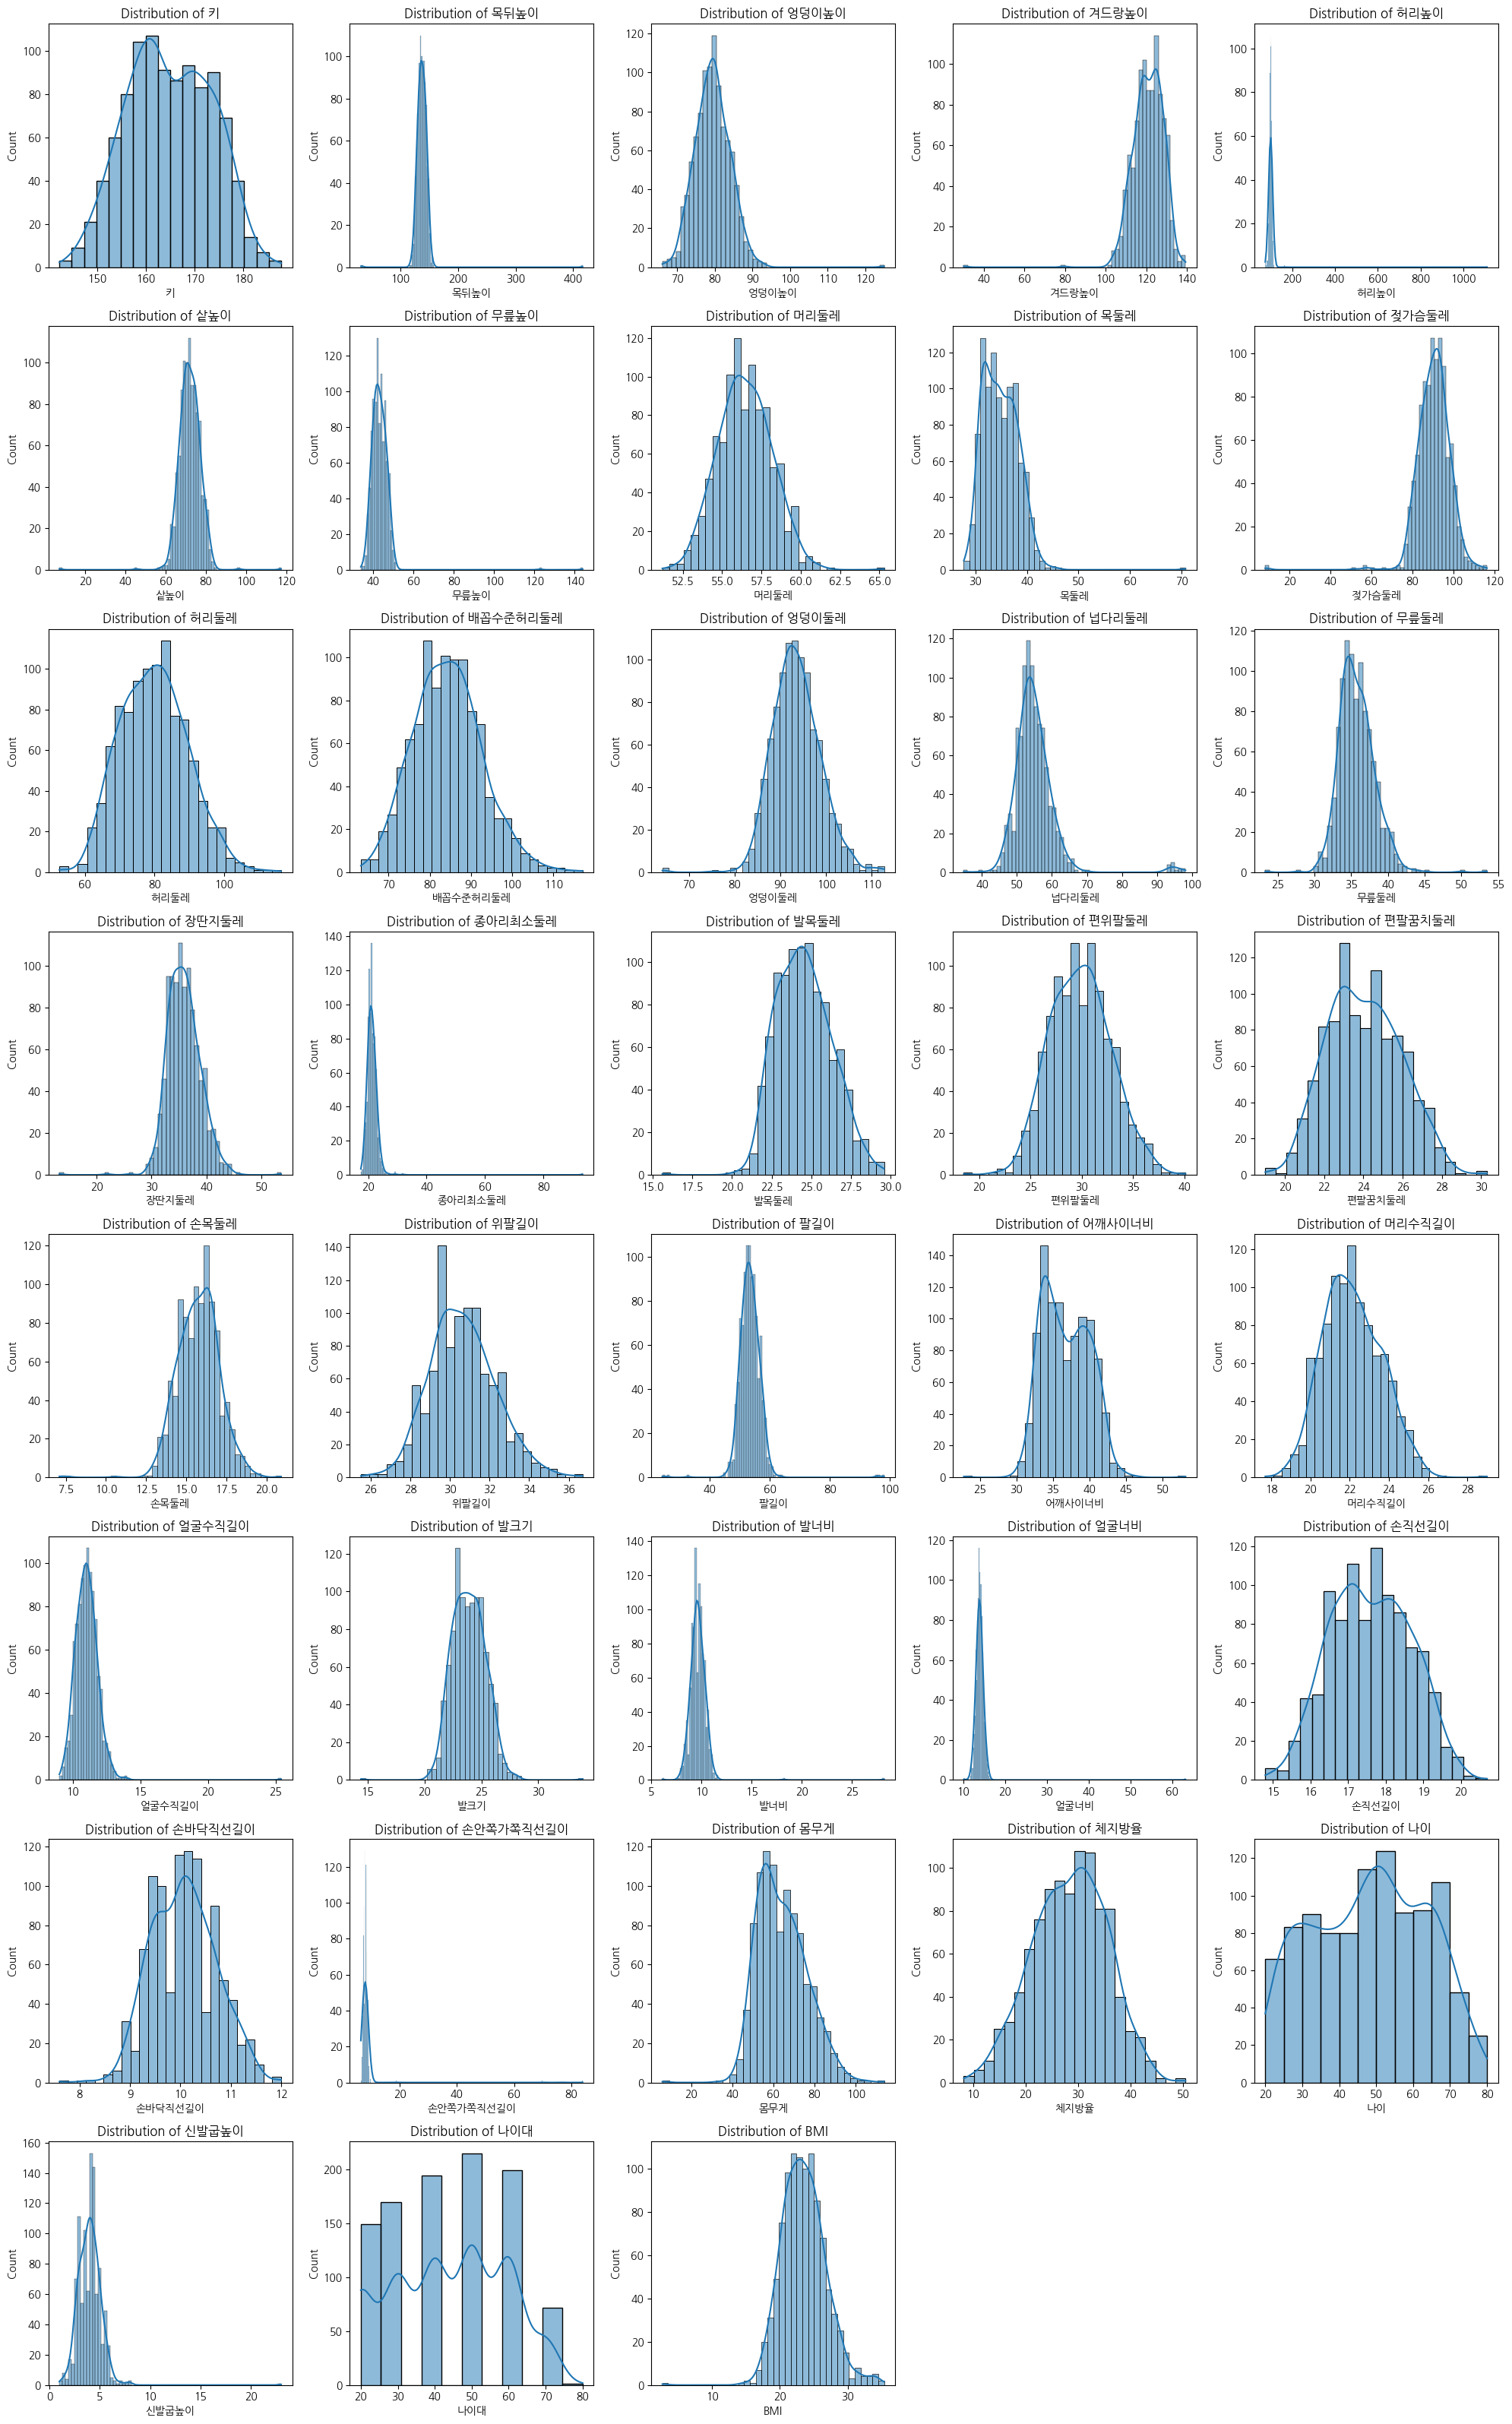

In [6]:
plt.figure(figsize=(15, 10))
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
grid_rows = int(np.ceil(len(numeric_columns) / 5))
grid_cols = 5

fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(20, 4 * grid_rows), squeeze=False)
axes = axes.flatten()  # axes 배열을 1차원으로 변환

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# 남은 빈 서브플롯 숨기기
for i in range(len(numeric_columns), grid_rows * grid_cols):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

p-value가 0.05보다 작으면, 데이터 정규분포를 따르지 않음

In [8]:
from scipy import stats

alpha = 0.05
non_normal_columns = []

df2 = df[numeric_columns]

for column in df2.columns:
    # Shapiro-Wilk 검정 실행
    stat, p_value = stats.shapiro(df[column])
    print(f'Column: {column}, P-value: {p_value}')

    # P-value가 alpha보다 작으면 정규분포를 따르지 않는 것으로 간주합니다.
    if p_value < alpha:
        non_normal_columns.append(column)

# 정규분포를 따르지 않는 컬럼명 출력
print("Non-normal distributed columns:", non_normal_columns)

Column: 키, P-value: 1.3320284324436216e-06
Column: 목뒤높이, P-value: 0.0
Column: 엉덩이높이, P-value: 2.9237025652464844e-16
Column: 겨드랑높이, P-value: 4.561422523650404e-24
Column: 허리높이, P-value: 0.0
Column: 샅높이, P-value: 9.12439509734981e-27
Column: 무릎높이, P-value: 1.401298464324817e-45
Column: 머리둘레, P-value: 0.00289070513099432
Column: 목둘레, P-value: 1.901684795136751e-21
Column: 젖가슴둘레, P-value: 2.3643074220267363e-27
Column: 허리둘레, P-value: 0.0004645094450097531
Column: 배꼽수준허리둘레, P-value: 0.00021428917534649372
Column: 엉덩이둘레, P-value: 8.236658577409628e-11
Column: 넙다리둘레, P-value: 8.200260164940554e-38
Column: 무릎둘레, P-value: 1.8672703679367122e-16
Column: 장딴지둘레, P-value: 2.275260939398928e-15
Column: 종아리최소둘레, P-value: 0.0
Column: 발목둘레, P-value: 6.40979820332177e-08
Column: 편위팔둘레, P-value: 0.06421177089214325
Column: 편팔꿈치둘레, P-value: 2.6800960768014193e-05
Column: 손목둘레, P-value: 8.372315969847055e-13
Column: 위팔길이, P-value: 0.0003378006804268807
Column: 팔길이, P-value: 2.2061439903470875e-37
Column: 

In [9]:
non_normal_columns

['키',
 '목뒤높이',
 '엉덩이높이',
 '겨드랑높이',
 '허리높이',
 '샅높이',
 '무릎높이',
 '머리둘레',
 '목둘레',
 '젖가슴둘레',
 '허리둘레',
 '배꼽수준허리둘레',
 '엉덩이둘레',
 '넙다리둘레',
 '무릎둘레',
 '장딴지둘레',
 '종아리최소둘레',
 '발목둘레',
 '편팔꿈치둘레',
 '손목둘레',
 '위팔길이',
 '팔길이',
 '어깨사이너비',
 '머리수직길이',
 '얼굴수직길이',
 '발크기',
 '발너비',
 '얼굴너비',
 '손직선길이',
 '손바닥직선길이',
 '손안쪽가쪽직선길이',
 '몸무게',
 '체지방율',
 '나이',
 '신발굽높이',
 '나이대',
 'BMI']

In [10]:
list_df = df.columns
for c in list_df:
  if c not in non_normal_columns:
    print(c)

편위팔둘레
성별
체중분류
